# Check my LES run

* The below notebook allows to compare a selected large-eddy simulation against a set of benchmark simulations (shown in gray).
* All requested 1D and 2D variables are here read and plotted. "load_sims" reports variable that are missing. Lines will not show, if a variable is missing or if it contains missing values.
* In case you find inconsistencies in the benchmark set or wish to expand the code, please contact Ann Fridlind (ann.fridlind@nasa.gov), Timothy Juliano (tjuliano@ucar.edu), and Florian Tornow (ft2544@columbia.edu).

In [1]:
%run functions_plotting.py

## select (grayed out) simulations to plot
sim_keyword_gray = 'dharma/sandbox/DHARMA_Lx25_dx100_FixN.'

## select LES run(s) of interest
sim_keyword_col_les = 'WRF_Lx25_dx100_FixN.'

## switches to diagnose variable
diagnose_zinv = True
diagnose_qliquid = True
diagnose_qfrozen = True  

In [2]:
vars_mean_list = pd.read_excel('https://docs.google.com/spreadsheets/d/1Vl8jYGviet7EtXZuQiitrx4NSkV1x27aJAhxxjBb9zI/export?gid=0&format=xlsx',
                              sheet_name='Mean')

## short names
var_vec_1d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time'])
var_vec_2d = np.asarray(vars_mean_list.variable_id[vars_mean_list.dimensions == 'time, height'])

## long names
var_vec_1d_long = np.asarray(vars_mean_list.standard_name[vars_mean_list.dimensions == 'time'])

## Units
var_vec_1d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time'])
var_vec_2d_units = np.asarray(vars_mean_list.units[vars_mean_list.dimensions == 'time, height'])

In [3]:
## load all simulations located in subfolders of the given directory
df_gray_1d,df_gray_2d = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_gray,make_gray = 1,diag_zi_ctt=diagnose_zinv,diag_qltot=diagnose_qliquid,diag_qitot=diagnose_qfrozen)

## example using LES
df_col_1d_les,df_col_2d_les = load_sims('../../output_les/',var_vec_1d,var_vec_2d,t_shift=-2,keyword=sim_keyword_col_les,diag_zi_ctt=diagnose_zinv,diag_qltot=diagnose_qliquid,diag_qitot=diagnose_qfrozen)

## update plotted variables and their units accordingly
if diagnose_qliquid:
    lwp_pos = np.where(var_vec_1d == 'ol')[0] + 1
    var_vec_1d = np.insert(var_vec_1d,lwp_pos,'lwp')
    var_vec_1d_long = np.insert(var_vec_1d_long,lwp_pos,'atmosphere_mass_content_total_cloud_water_diagnosed')
    var_vec_1d_units = np.insert(var_vec_1d_units,lwp_pos,'kg m-2')
    
    qliq_pos = np.where(var_vec_2d == 'qlc')[0]
    var_vec_2d = np.insert(var_vec_2d,qliq_pos,'qltot')
    var_vec_2d_units = np.insert(var_vec_2d,qliq_pos,'kg kg-1')

if diagnose_qfrozen:
    qice_pos = np.where(var_vec_2d == 'qic')[0]
    var_vec_2d = np.insert(var_vec_2d,qice_pos,'qitot')
    var_vec_2d_units = np.insert(var_vec_2d,qice_pos,'kg kg-1')

if diagnose_zinv:    
    cth_pos = np.where(var_vec_1d == 'ol')[0] + 1
    var_vec_1d = np.insert(var_vec_1d,cth_pos,'cth')
    var_vec_1d_long = np.insert(var_vec_1d_long,cth_pos,'diagnosed_cloud_top_height')
    var_vec_1d_units = np.insert(var_vec_1d_units,cth_pos,'m')
    

Loading variables: f(time)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
ssaf shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
Loading variables: f(time,height)
../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
na1 shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
na2 shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
na3 shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
dna_micro_warm shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
dna_micro_cold shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
dna_turb shows NAN values in ../../output_les/dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
computing inversion height, cloud-top height, and cloud-top temperature
using liquid(-ice) potential temperature
dharma/sandbox/DHARMA_Lx25_dx100_FixN.nc
Loading variables: f(time)
../../output_les/wrf/sandbox/WRF_Lx25_dx

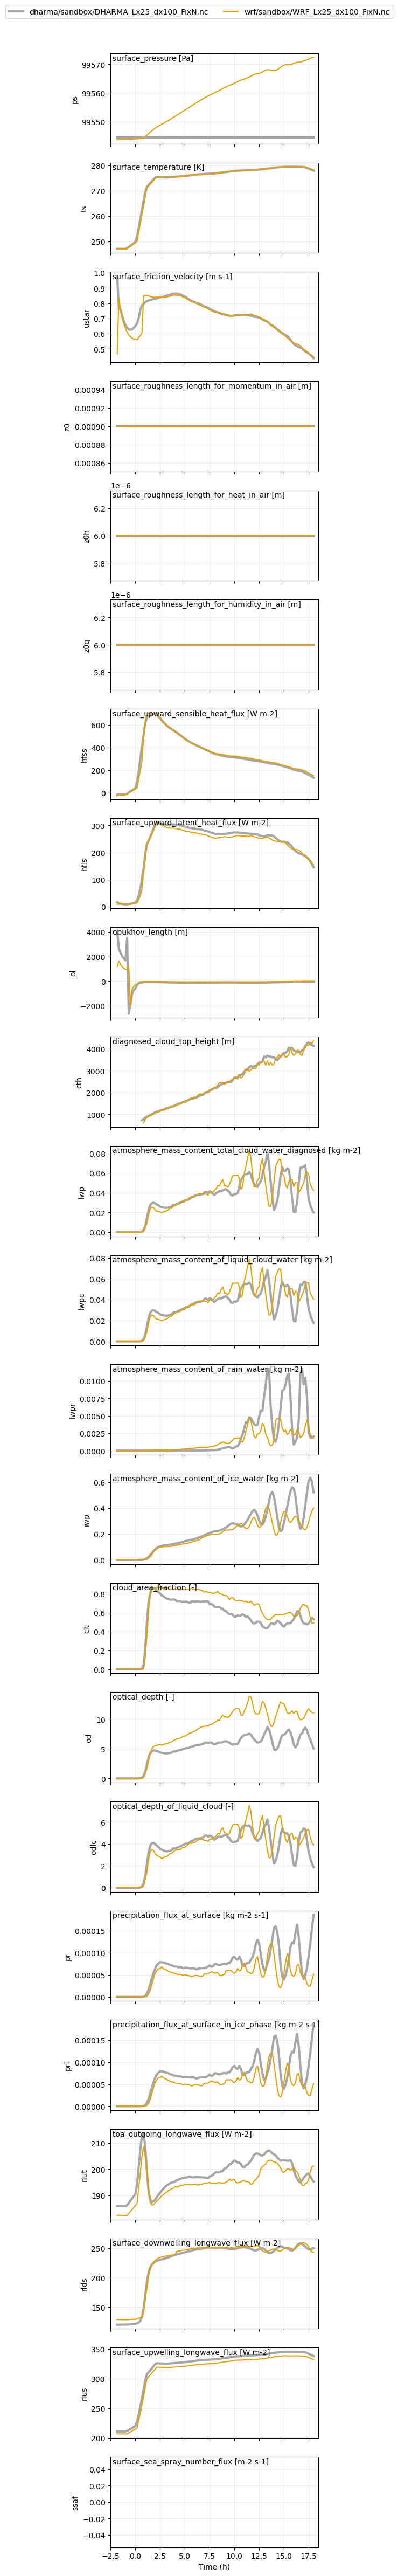

In [4]:
## plot variables that have only time dependence
plot_1d(pd.concat([df_gray_1d,df_col_1d_les]),var_vec_1d,longnames=var_vec_1d_long,units=var_vec_1d_units)

temporal averaging over 1.0 h interval


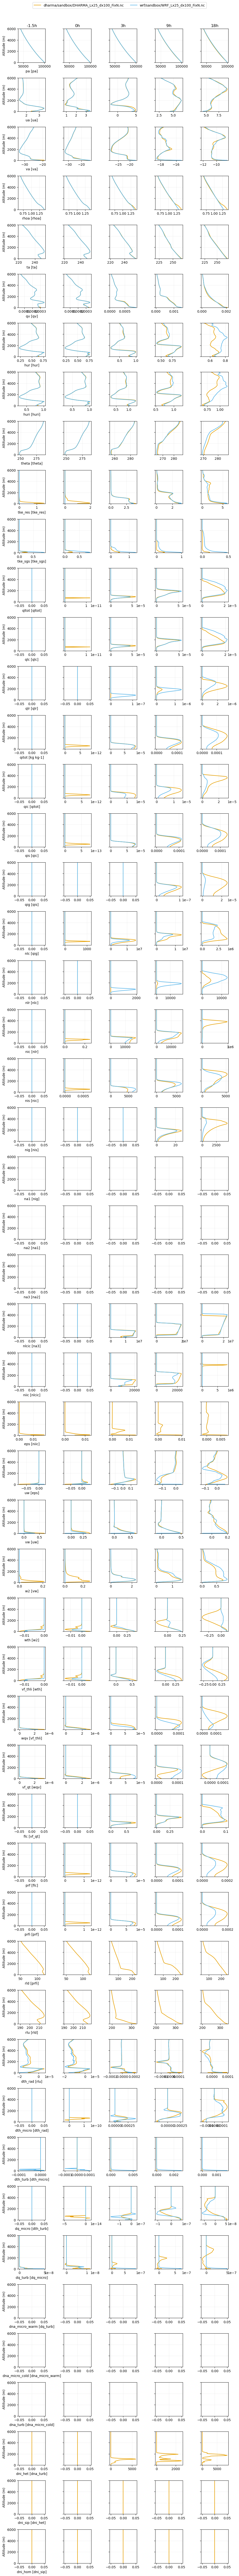

<Figure size 1000x600 with 0 Axes>

In [5]:
## example where ERA5 and radiosonde are included
plot_2d(pd.concat([df_gray_2d,df_col_2d_les]),var_vec_2d,times=[-1.5,0,3,9,18],z_max=6000,units=var_vec_2d_units)

temporal averaging over 1.0 h interval


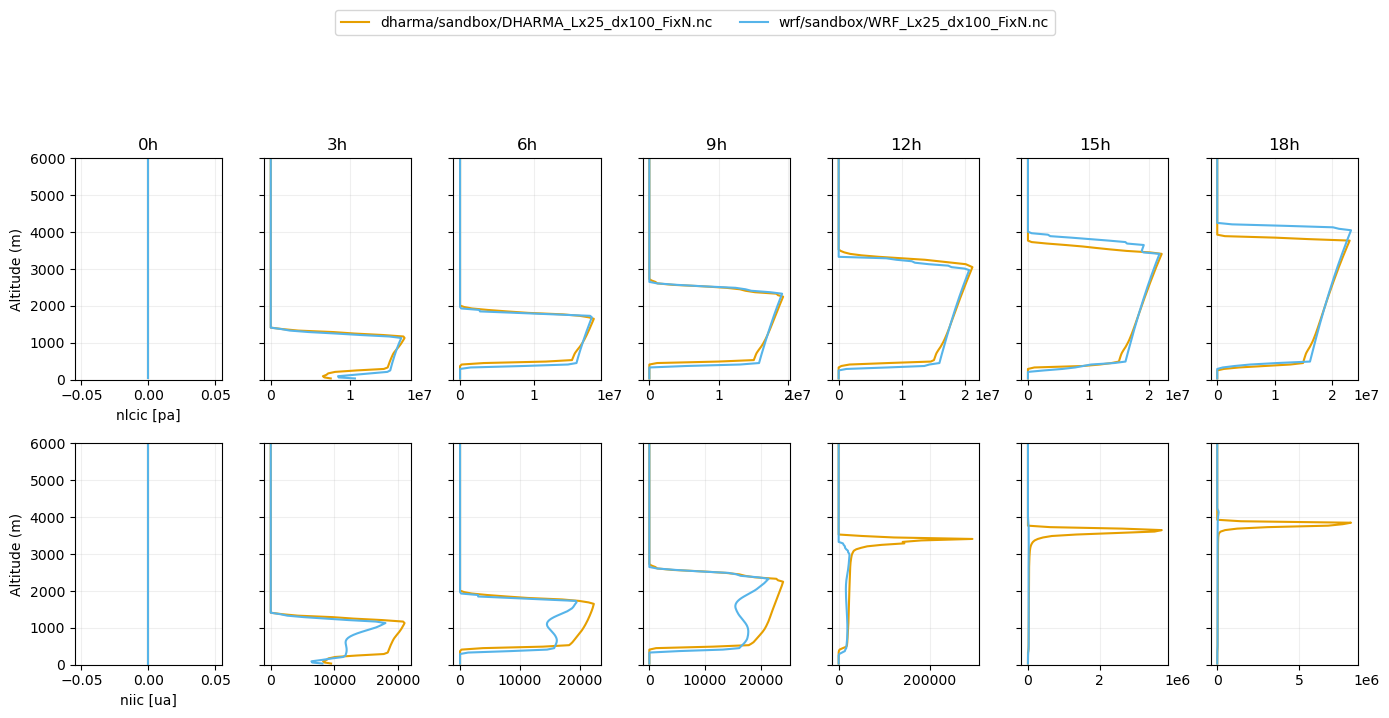

<Figure size 1000x600 with 0 Axes>

In [6]:

plot_2d(pd.concat([df_gray_2d,df_col_2d_les]),['nlcic','niic'],times=[0,3,6,9,12,15,18],z_max=6000,units=var_vec_2d_units)

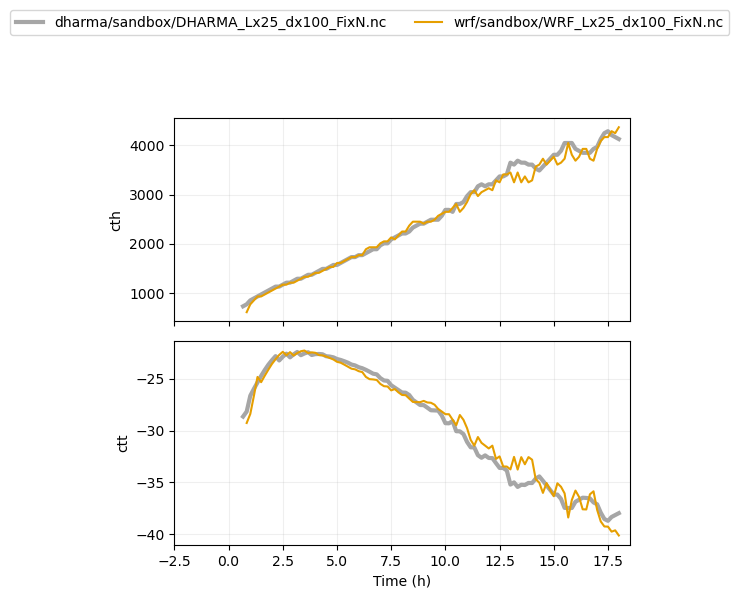

In [7]:

plot_1d(pd.concat([df_gray_1d,df_col_1d_les]),['cth','ctt'])